# FINAL PROJECT



Ok, first we are going to get everything set up by importing the useful libraries (pandas, numpy, and matplot).

In [207]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Awesome!

The first metric we will be analyzing is playing fields.

## Playing Fields

![playing fields](https://www.usu.edu/campusrec/images/ALF%20for%20tv%20small.jpg)

Now, lets read in the data set for playing fields around Pittsburgh and take a look.

In [208]:
playing_fields = pd.read_csv("https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23")
playing_fields.head()

,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,290.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,122.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,150.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,373.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,185.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870


Ok everything looks good.

Before we do anything else, why don't we get a better picture of the neighborhoods we are dealing with here.

In [209]:
playing_fields["neighborhood"].unique()

array(['South Side Slopes', 'South Side Flats', 'Lower Lawrenceville',
       'Banksville', 'Allentown', 'Brighton Heights', 'Hazelwood',
       'Lincoln-Lemington-Belmar', 'Windgap', 'Troy Hill',
       'South Oakland', 'Brookline', 'Arlington', 'Mount Washington',
       'Crafton Heights', 'East Hills', 'East Liberty', 'Highland Park',
       'Squirrel Hill South', 'Upper Lawrenceville', 'Fineview',
       'Regent Square', 'Garfield', 'Perry South', 'Perry North',
       'Elliott', 'Beechview', 'Morningside', 'Central Lawrenceville',
       'Bedford Dwellings', 'Terrace Village', 'Larimer', 'Beltzhoover',
       'Greenfield', 'Manchester', 'Allegheny Center', 'Central Oakland',
       'Lincoln Place', 'Sheraden', 'Shadyside', 'Spring Garden',
       'Oakwood', 'Stanton Heights', 'Carrick', 'Marshall-Shadeland',
       'Spring Hill-City View', 'West End', 'Polish Hill', 'Westwood',
       'Squirrel Hill North', 'Homewood South'], dtype=object)

That gives us the names of the individual neighborhoods, but what about knowing exactly how many we are working with.

We can easily check this with a small change to the previous code

In [210]:
playing_fields["neighborhood"].nunique()

51

Ok, how about how many playing fields we need to consider.

In [211]:
len(playing_fields)

113

That's actually pretty good, especially considering that a significant amount of the data set covers urban regions, which makes it somewhat more difficult to find the land needed for playing fields.

Now, lets breakdown the data set to analyze how the playing fields are distributed by neighborhood

In [212]:
playing_fields["neighborhood"].value_counts()

Brighton Heights            7
South Side Slopes           6
Brookline                   6
Squirrel Hill South         5
Carrick                     5
Hazelwood                   4
Lower Lawrenceville         4
Highland Park               4
Mount Washington            3
Beechview                   3
Sheraden                    3
Troy Hill                   3
Beltzhoover                 3
Shadyside                   3
Morningside                 3
Crafton Heights             2
Banksville                  2
Spring Hill-City View       2
Lincoln-Lemington-Belmar    2
Manchester                  2
South Oakland               2
Elliott                     2
Greenfield                  2
Central Lawrenceville       2
South Side Flats            2
Regent Square               2
Bedford Dwellings           2
Perry North                 2
Allegheny Center            2
Westwood                    2
East Liberty                1
Polish Hill                 1
Homewood South              1
Oakwood   

This gives us a solid idea of the distribution of playing fields across the various neighborhoods in Pittsburgh, but we can create a visual representation as well to add some more insight.

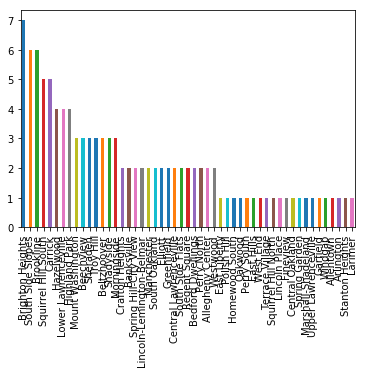

In [213]:
playing_fields["neighborhood"].value_counts().plot(kind="bar")

From both representations of the data, we see that there isn't a ton of variability in the amount of playing fields per neighborhood; however, there are definitely a few neighborhoods that stand out at the top, for instance Brighton Heights leading the pack with seven.

Lets take a closer look at the top five.

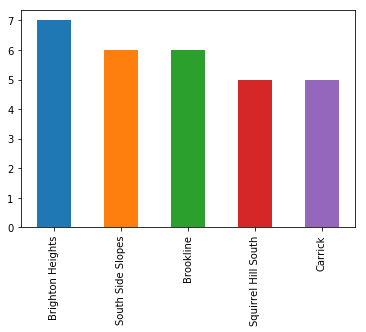

In [214]:
playing_fields["neighborhood"].value_counts().head().plot(kind="bar")

Perfect, we have our top five comprised of Brighton Heights, South Side Slopes, Brookline, Squirrel Hill South, and Carrick. We could simply end our investigation here, but the data has a few quirks that we should consider.

As we look through the data set, it seems designed to consider mainly baseball fields, with individual field locations classified by the shape(s)/usage of the field(s). Lets examine what types of fields we are working with. 

In [215]:
playing_fields["field_usage"].unique()

array(['Diamond Only', 'Diamond and Rectangular', 'Rectangular Only'],
      dtype=object)

So, there are fields used only for the diamond, rectangular fields that lack a diamond, and locations that are multi-purpose, offering both a rectangular field and a diamond. For these multi-purpose locations, the data set does not specify whether their mixed usage is because there are multiple fields at the location or that the singular field has all of the equipment and lines to be used for all kinds of activities. We will be assuming the later, that each piece of data corresponds to one field only, in order to avoid the complexities that accompany the other option.  

Something else to consider is that the data set's design has left it impossible to gauge the size of rectangular fields, as the size of the fields is only indicated by the distance from home plate to left, center, and right field respectively. Obviously, this complicates things as their is no way to measure exactly how much land each neighborhood has dedicated to playing fields.

Furthermore, the data set also contains a "has_lights" field that stipulates whether or not the field has lights, giving us another factor to consider. Playing fields with lights are arguably more valuable than those without, as they can be used for greater periods of time. 

So, how are we going to take these factors into account. By default, we will give all playing fields a value of 1. Fields that are multi-purpose will recieve an additional half-point on top of that. We will be giving fields with lights an additional .25 as well to account for the additional use they offer that fields without lights lack.  

So, lets apply this to the data by generating two subsets of the original data that encompass multi-purpose fields and fields with lights

In [216]:
both_options = playing_fields["field_usage"] == "Diamond and Rectangular"
multi_purpose = playing_fields[both_options]
multi_purpose["neighborhood"].value_counts()

Morningside              3
Highland Park            2
Westwood                 2
Brookline                2
Central Lawrenceville    2
South Side Flats         1
Polish Hill              1
Lower Lawrenceville      1
Terrace Village          1
West End                 1
Elliott                  1
Sheraden                 1
Homewood South           1
Allegheny Center         1
Beltzhoover              1
Name: neighborhood, dtype: int64

This represents the number of fields in each neighborhood that are multi-purpose, meaning they have both a diamond and a rectangular field.

We will factor this into the final equation to determine the best neighborhood in Pittsburgh.

Here are some visuals for the data.

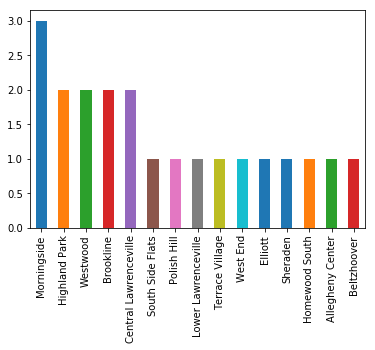

In [217]:
multi_purpose["neighborhood"].value_counts().plot(kind="bar")

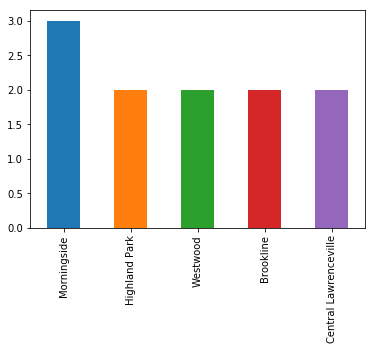

In [218]:
multi_purpose["neighborhood"].value_counts().head().plot(kind="bar")

In [219]:
has_lights = playing_fields["has_lights"] == "t"
fields_with_lights = playing_fields[has_lights]
fields_with_lights["neighborhood"].value_counts()

South Side Slopes           4
Carrick                     3
Morningside                 3
Brookline                   3
Troy Hill                   3
Mount Washington            3
Greenfield                  2
Crafton Heights             2
Squirrel Hill South         2
Lower Lawrenceville         2
Bedford Dwellings           2
Elliott                     2
Westwood                    2
Central Lawrenceville       2
Beechview                   2
Manchester                  1
Homewood South              1
Perry South                 1
Sheraden                    1
Shadyside                   1
Perry North                 1
Beltzhoover                 1
Terrace Village             1
Fineview                    1
Banksville                  1
Spring Hill-City View       1
Hazelwood                   1
South Oakland               1
Windgap                     1
Garfield                    1
Lincoln-Lemington-Belmar    1
Polish Hill                 1
Name: neighborhood, dtype: int64

This represents the number of fields in each neighborhood that have lights.

We will factor this into the final equation to determine the best neighborhood in Pittsburgh.

Here are some visuals for the data.

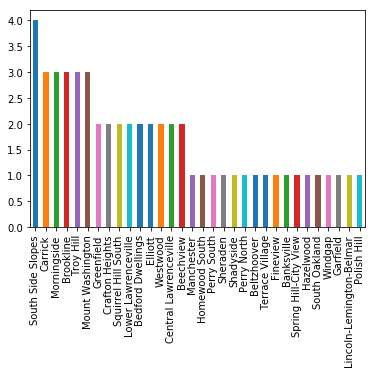

In [220]:
fields_with_lights["neighborhood"].value_counts().plot(kind="bar")

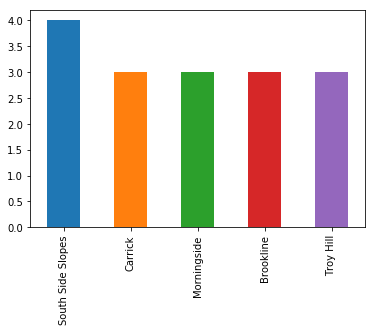

In [221]:
fields_with_lights["neighborhood"].value_counts().head().plot(kind="bar")

Now lets step away from the playing fields and begin to look at playgrounds in Pittsburgh.

## Playgrounds

Let's real quick import the data set.

In [222]:
playgrounds = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
playgrounds.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021831
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


How many neighborhoods have playgrounds in Pittsburgh?

In [223]:
playgrounds["neighborhood"].unique()

array(['Beechview', 'Crawford-Roberts', 'Central Northside',
       'Bedford Dwellings', 'South Side Slopes', 'South Side Flats',
       'Lower Lawrenceville', 'Banksville', 'Homewood North', 'Bon Air',
       'Central Oakland', 'Brighton Heights', 'Brookline', 'Hazelwood',
       'Squirrel Hill South', 'Spring Garden', 'Lincoln-Lemington-Belmar',
       'Windgap', 'Troy Hill', 'Westwood', 'Perry South', 'Homewood West',
       'Allegheny Center', 'Strip District', 'Stanton Heights',
       'Crafton Heights', 'West Oakland', 'East Carnegie',
       'Duquesne Heights', 'East Liberty', 'Esplen', 'Fairywood',
       'Highland Park', 'Upper Lawrenceville', 'Fineview',
       'Regent Square', 'Garfield', 'Greenfield', 'South Oakland',
       'Allentown', 'Hays', 'Elliott', 'Morningside', 'Terrace Village',
       'Larimer', 'Carrick', 'Central Lawrenceville', 'Lincoln Place',
       'Manchester', 'Marshall-Shadeland', 'Sheraden', 'Beltzhoover',
       'Shadyside', 'Mount Washington', 'Oakwo

That looks like quite a bit more than when we were looking at the playing fields. How many neighborhoods do we have here.

In [224]:
playgrounds["neighborhood"].nunique()

67

There's 16 more neighborhoods here! We'll have to account for that later when deciding which neighborhood is the best for your kids.

Now how many parks do we have exactly?

In [225]:
len(playgrounds)

121

That's a fair amount of playgrounds, just some quick math would recommend just under an average of 2 playgrounds per neighborhood.

Why don't we see how many playgrounds each neighborhood actually has?

In [226]:
playgrounds["neighborhood"].value_counts()

Squirrel Hill South         8
South Side Slopes           5
Beechview                   5
Sheraden                    4
Highland Park               4
Allegheny Center            4
Mount Washington            3
Hazelwood                   3
South Oakland               3
Elliott                     3
Beltzhoover                 3
Crawford-Roberts            3
Carrick                     3
Garfield                    2
Manchester                  2
Central Northside           2
Bloomfield                  2
East Liberty                2
Lincoln Place               2
Marshall-Shadeland          2
Lincoln-Lemington-Belmar    2
Troy Hill                   2
Brighton Heights            2
Crafton Heights             2
Greenfield                  2
Upper Lawrenceville         2
South Side Flats            2
Morningside                 2
Brookline                   2
Terrace Village             1
                           ..
Perry North                 1
Esplen                      1
Bluff     

How about we make that more visual.

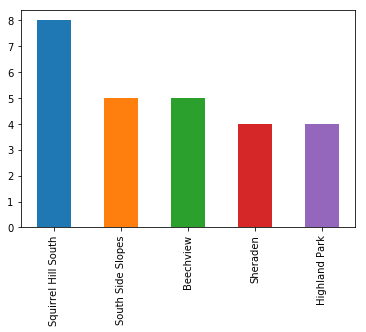

In [227]:
playgrounds["neighborhood"].value_counts().head().plot(kind="bar")

Wow! Immediately we see Squirrel Hill South with the most but a large margin, sitting on top with 8 playgrounds. Followed by Beechview and South Side Slopes tied with 5. So its safe to say Squirrel Hill South is the best neighborhood in terms of playgrounds, right?

Not necessarily, a big aspect of playground is having thing for everyone. Luckily for us, we have another dataset on playground equipment and whether they are ADA accessible. For those who don't know the ADA is the American with Disabilities Act, and sets guidelines on the accessibilty requirements of public and commercial land in order to prohibit discrimination against the disabled.

For example Chartiers Playground contains ADA accessible swings:
![ ](https://tools.wprdc.org/images/pittsburgh/playgrounds/Chartiers_Playground.jpg)

Now with this in mind lets pop our new database into pandas and run some of the same code one it.

In [228]:
playground_equipment = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
playground_equipment.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817


In [229]:
playground_equipment["neighborhood"].unique()

array(['Beechview', 'Allegheny Center', 'Squirrel Hill South', 'Windgap',
       'Perry South', 'Crafton Heights', 'Fineview', 'Terrace Village',
       'Hazelwood', 'Lincoln Place', 'Sheraden', 'Brookline', 'Oakwood',
       'New Homestead', 'South Side Slopes', 'Upper Hill',
       'Brighton Heights', 'Allentown', 'East Liberty', 'Highland Park',
       'Central Northside', 'Bloomfield', 'Mount Washington', 'Shadyside',
       'Westwood', 'Hays', 'Polish Hill', 'Central Oakland',
       'Lincoln-Lemington-Belmar', 'Esplen', 'Greenfield',
       'Crawford-Roberts', 'Bedford Dwellings', 'Marshall-Shadeland',
       'Beltzhoover', 'West Oakland', 'Elliott', 'Spring Garden',
       'Homewood West', 'Strip District', 'Stanton Heights',
       'East Carnegie', 'Upper Lawrenceville', 'South Oakland',
       'Morningside', 'South Side Flats', 'Central Lawrenceville',
       'Manchester', 'Garfield', 'Lower Lawrenceville', 'Carrick',
       'Spring Hill-City View', 'Bluff', 'Middle Hill', 'Ba

In [230]:
playground_equipment["neighborhood"].nunique()

66

Uh oh, it seems we have one less neighborhood. That's okay, we'll assume that playground has no ADA accessible equipement when we get to the end.

In [231]:
playground_equipment["neighborhood"].value_counts()

Squirrel Hill South         32
Beechview                   21
Allegheny Center            15
South Side Slopes           14
Sheraden                    13
Hazelwood                   13
Mount Washington            10
Highland Park               10
Regent Square                9
Garfield                     9
Lincoln Place                9
East Liberty                 8
Fineview                     8
Brighton Heights             8
Carrick                      7
Brookline                    7
Beltzhoover                  7
Bloomfield                   7
Greenfield                   7
Manchester                   7
Elliott                      7
Troy Hill                    7
South Oakland                7
Lincoln-Lemington-Belmar     6
Banksville                   6
Swisshelm Park               6
Perry North                  6
Crawford-Roberts             6
Crafton Heights              5
Marshall-Shadeland           5
                            ..
Oakwood                      4
Homewood

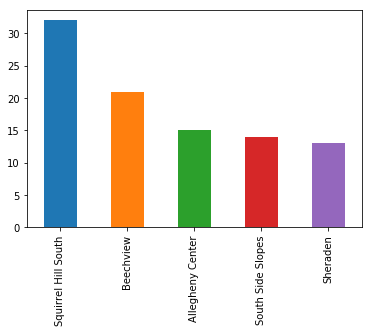

In [232]:
playground_equipment["neighborhood"].value_counts().head().plot(kind="bar")

So now we've arrived with a new graph featuring similar faces from the earlier graph. We still see Squirrel Hill South dominating the competition though. However, we have not filtered out the ADA accessible yet. So lets do that.

In [233]:
accessible = playground_equipment["ada_accessible"] == "t"
accessible_playgrounds = playground_equipment[accessible]

accessible_playgrounds.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
10,1811257536,Cross and Strauss Playground,Swing 2 Bays,Little Tykes,Pour in Place,t,NaN,Cross St,Perry South,6,26,42003261400,1,26,1,1-12,40.465189,-80.020173
15,490747758,Dunbar Playground,Swing 2 Bays,Playworld,Pour in Place,t,1201.0,Clairhaven St,Crafton Heights,2,28,42003281500,5,28,6,1-18,40.439321,-80.051894
18,595152426,Fineview Playground,Swing 2 Bays,Playworld,Greenpark Breakfall,t,NaN,Fineview Ave,Fineview,1,25,42003250900,1,25,1,1-10,40.461713,-80.003621


In [234]:
accessible_playgrounds["neighborhood"].value_counts()

Squirrel Hill South         7
South Side Slopes           4
Beechview                   4
Mount Washington            3
Sheraden                    3
Elliott                     3
Highland Park               3
Brighton Heights            2
Fineview                    2
Lincoln-Lemington-Belmar    2
South Side Flats            2
Carrick                     2
Hazelwood                   2
Beltzhoover                 2
Greenfield                  2
Bloomfield                  2
Manchester                  2
Morningside                 2
East Liberty                2
Crawford-Roberts            2
Duquesne Heights            1
Homewood West               1
Windgap                     1
Marshall-Shadeland          1
South Oakland               1
Central Lawrenceville       1
Spring Hill-City View       1
West End                    1
Upper Hill                  1
Lincoln Place               1
Perry South                 1
New Homestead               1
Point Breeze North          1
Terrace Vi

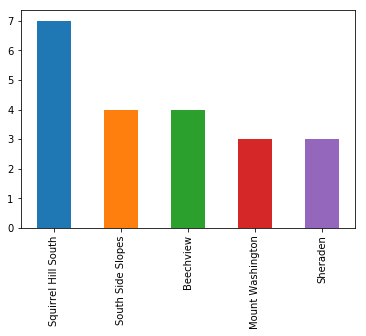

In [235]:
accessible_playgrounds["neighborhood"].value_counts().head().plot(kind="bar")

Even within ADA accessible playground equipment Squirrel Hill South remains on top, surprisingly we also see South Side Slopes return to its spot tied with Beechview in second after if dropped initially while looking at total playground equipment. Squirrel Hill South's numbers within each category will definitely earn it the top spot for playgrounds.

## Pools

When admiring your Childhood it's hard to  neglect the beauty and fun that Spray Parks and pools offered. As such, we can't possibly look at the best neighborhood and not take a look at the water based fun that can be found in many of the neighborhoods of Pittburgh.

In [236]:
pitt_pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
pitt_pools.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414989,-80.019170
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405065,-79.936896


_____________________________________________________________________________________
    ***************************************************************************

Nice, the data set looks promising so far. After all everyone likes a good pool. that being said, there is a column called neighborhood but let us take a closer look at what neighbors are actually fun and contain a pool/spray park.

    *********************************************************************************
_________________________________________________________________________________________

In [237]:
pitt_pools["neighborhood"].unique()

array(['Bedford Dwellings', 'Banksville', 'Beechview', 'Bloomfield',
       'Hazelwood', 'Troy Hill', 'East Hills', 'Highland Park',
       'Homewood South', 'Brighton Heights', 'Greenfield',
       'Lincoln Place', 'Shadyside', 'Brookline', 'South Side Flats',
       'Carrick', 'Mount Washington', 'Perry North',
       'Squirrel Hill South', 'Sheraden', 'Allegheny Center',
       'Beltzhoover', 'Polish Hill', 'Westwood', 'South Side Slopes',
       'Lincoln-Lemington-Belmar'], dtype=object)

Not going to lie, that makes me dizzy just looking at it. If only there was a way to look
at the exact number of neighborhoods invloved... ahh but ofcourse that is the whole point
of python. Let us make use of those labs and search for the exact number.

In [238]:
pitt_pools["neighborhood"].nunique()

26

_____________________________________________________________________________________
    ***************************************************************************

Not too shabby, I gurantee you that you inner child would have loved to try them all and
see which one is the king of pools, but let us do that for you. To further out search
we want to see how many pools there are in total.

    *********************************************************************************
_________________________________________________________________________________________

In [239]:
len(pitt_pools)

28

_____________________________________________________________________________________
    ***************************************************************************

26 neighborhoods and 28 pools, something doesn't add up, so let's see what neighborhood(s)
have extra pools! Honestly there is no denying that that is a major bonus to our water fun
metric.

    *********************************************************************************
_________________________________________________________________________________________

In [240]:
pitt_pools["neighborhood"].value_counts()

South Side Flats            2
Highland Park               2
Beechview                   1
Lincoln Place               1
Carrick                     1
Bedford Dwellings           1
Homewood South              1
Sheraden                    1
Beltzhoover                 1
East Hills                  1
Perry North                 1
Brookline                   1
Westwood                    1
Bloomfield                  1
Polish Hill                 1
Allegheny Center            1
Brighton Heights            1
Mount Washington            1
Hazelwood                   1
Troy Hill                   1
Greenfield                  1
Shadyside                   1
Banksville                  1
Lincoln-Lemington-Belmar    1
Squirrel Hill South         1
South Side Slopes           1
Name: neighborhood, dtype: int64

_____________________________________________________________________________________
    ***************************************************************************

While that is a very simple list I much prefer a good visual so let's put our trusty data
and make a good old bar graph out of it so that we can truly appreciate the neighborhoods
with more pools/spray parks!

    *********************************************************************************
_________________________________________________________________________________________

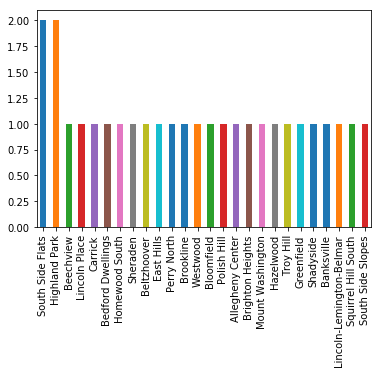

In [241]:
pitt_pools["neighborhood"].value_counts().plot(kind="bar")

_____________________________________________________________________________________
    ***************************************************************************

Granted that there seems to be a general trend with most neighborhood containing 1 with 
the exception of 2, but let us zoom into this rather hectic graph inorder to look at the
top five.

    *********************************************************************************
_________________________________________________________________________________________

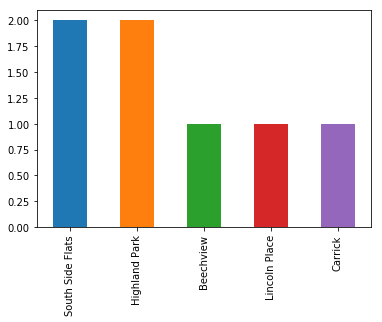

In [242]:
pitt_pools["neighborhood"].value_counts().head().plot(kind="bar")

_____________________________________________________________________________________
    ***************************************************************************

While we love keeping very casual and indulging in the fun and games that comes with talking
about pools but we can't be total irreponsible adults and neglect to talk about the source of
the water. We decide that of the few companies that source water for all the pools in Pittsburgh, Pittsburgh Water and Sewer Authority is the safest for children.

    *********************************************************************************
_________________________________________________________________________________________

In [243]:
best_company = pitt_pools["water_source"] == "Pittsburgh Water and Sewer Authority"
best_water = pitt_pools[best_company]
best_water.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405065,-79.936896
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458739,-79.988366
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482011,-79.911280


_____________________________________________________________________________________
    ***************************************************************************

Now lets make a list of the neighborhoods that met the criteria!

     *********************************************************************************
_________________________________________________________________________________________

In [244]:
best_water["neighborhood"].value_counts()

Highland Park               2
South Side Flats            1
Greenfield                  1
Brighton Heights            1
Bedford Dwellings           1
Mount Washington            1
Squirrel Hill South         1
Troy Hill                   1
Beltzhoover                 1
Perry North                 1
Allegheny Center            1
Shadyside                   1
Bloomfield                  1
Lincoln-Lemington-Belmar    1
Homewood South              1
Hazelwood                   1
Polish Hill                 1
Carrick                     1
Name: neighborhood, dtype: int64

 _____________________________________________________________________________________
    ***************************************************************************

Now to make a visual detailing which neighborhood follows through.

     *********************************************************************************
_________________________________________________________________________________________

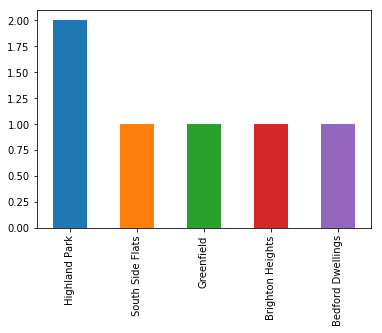

In [245]:
best_water["neighborhood"].value_counts().head().plot(kind="bar")

As you can see South Slide Flats's two parks match the criteria, which is a good indication of 
both their consistancy and safety!

_____________________________________________________________________________________
    ***************************************************************************

Now getting the arguably the most important part, space. A pool is only worth the title of king of pools if it has the space to back it up, keep in mind that the only ones being considered here are the ones that are type = pools, obvioulsy spray parks have the own point system that is worth simple because spray parks are objectively funner (also inclusive to those that don't know how to swim) and safer than pools :)

     *********************************************************************************
_________________________________________________________________________________________

In [246]:
spacious_pools = pitt_pools["capacity"] <= 250000
better_pools = pitt_pools[spacious_pools]
better_pools.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454310,-79.899891
10,2092220498,Jack Stack,Pool,NaN,Pittsburgh Water and Sewer Authority,205800.0,https://tools.wprdc.org/images/pittsburgh/pool...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.486884,-80.030632
11,778775283,Magee,Pool,NaN,Pittsburgh Water and Sewer Authority,195000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Greenfield,5,15,42003151700,3,15,4,2-15,40.424814,-79.937006
12,23531050,McBride,Pool,NaN,Pennsylvania American Water,18000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Lincoln Place,5,31,42003310200,3,31,4,4-20,40.370392,-79.907340


_____________________________________________________________________________________
    ***************************************************************************

Once again let us make a list with the data we have and let their true sea-through (pun intened) colors show!

    *********************************************************************************
_________________________________________________________________________________________

In [247]:
better_pools["neighborhood"].value_counts()

South Side Flats       2
Perry North            1
Greenfield             1
Westwood               1
Polish Hill            1
Homewood South         1
Brighton Heights       1
Lincoln Place          1
Squirrel Hill South    1
Banksville             1
Carrick                1
Name: neighborhood, dtype: int64

_____________________________________________________________________________________
    ***************************************************************************

Looking Good!, Last but not least let us this fun inducing data in an easier format to digest!

     *********************************************************************************
_________________________________________________________________________________________

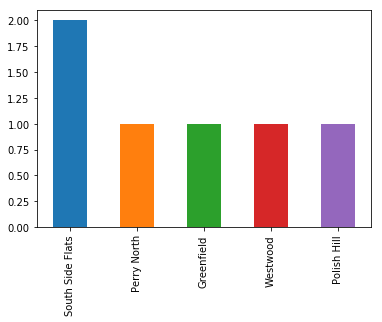

In [248]:
better_pools["neighborhood"].value_counts().head().plot(kind="bar")

Now we'll filter out a dataframe of all the Spray Parks.

In [249]:
spray_park = pitt_pools["type"] == "Spray Park"
spray_parks = pitt_pools[spray_park]

spray_parks.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414989,-80.019170
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405065,-79.936896
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458739,-79.988366
6,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453091,-79.871036
13,1622961249,Mellon Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Shadyside,8,7,42003070800,2,7,4,3-13,40.454020,-79.915647


In [250]:
spray_parks["neighborhood"].value_counts()

East Hills                  1
Beltzhoover                 1
Beechview                   1
Hazelwood                   1
Lincoln-Lemington-Belmar    1
South Side Slopes           1
Troy Hill                   1
Shadyside                   1
Name: neighborhood, dtype: int64

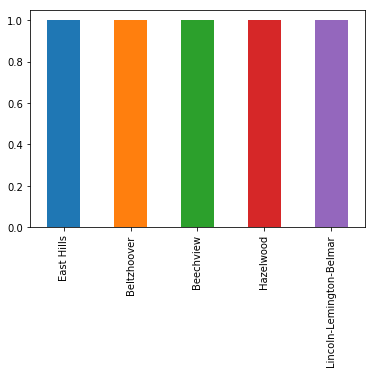

In [251]:
spray_parks["neighborhood"].value_counts().head().plot(kind="bar")

Lastly, we'll filter out a dataframe of pools from the dataset.

In [252]:
pool = pitt_pools["type"] == "Pool"
pools = pitt_pools[pool]

pools.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482011,-79.911280
8,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482170,-79.910927


In [253]:
pools["neighborhood"].value_counts()

South Side Flats       2
Highland Park          2
Brighton Heights       1
Bedford Dwellings      1
Bloomfield             1
Allegheny Center       1
Lincoln Place          1
Sheraden               1
Greenfield             1
Perry North            1
Brookline              1
Westwood               1
Banksville             1
Homewood South         1
Squirrel Hill South    1
Mount Washington       1
Polish Hill            1
Carrick                1
Name: neighborhood, dtype: int64

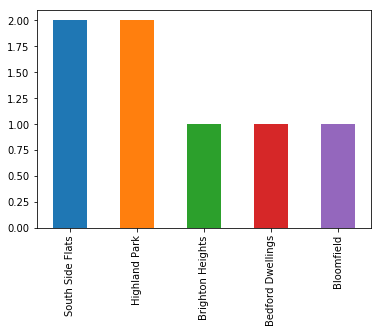

In [254]:
pools["neighborhood"].value_counts().head().plot(kind="bar")

And there you have it folks!

## Evaluation

Now that we have everything that we will be evaluating we can start creating our metric and find out for sure which neighborhood is the best!

First, lets head back to the **playing field** data sets:

For this we want to give the each neighborhood a point per playing field in general, but award and extra 0.25 points if they have lights and an extra 0.5 points if they have both a rectangular and diamond field. This gives us the equation:

`P + (0.25)L + (0.5)B = F` 

Where `P` is the total number of fields, `L` is the number of fields with lights, `B` is the number of fields with both rectangular and diamond, and `F` is our final field value.

First we'll create a dataframe with the neighborhood playing field count.

In [255]:
df1 = playing_fields["neighborhood"].value_counts()
print(df1)

Brighton Heights            7
South Side Slopes           6
Brookline                   6
Squirrel Hill South         5
Carrick                     5
Hazelwood                   4
Lower Lawrenceville         4
Highland Park               4
Mount Washington            3
Beechview                   3
Sheraden                    3
Troy Hill                   3
Beltzhoover                 3
Shadyside                   3
Morningside                 3
Crafton Heights             2
Banksville                  2
Spring Hill-City View       2
Lincoln-Lemington-Belmar    2
Manchester                  2
South Oakland               2
Elliott                     2
Greenfield                  2
Central Lawrenceville       2
South Side Flats            2
Regent Square               2
Bedford Dwellings           2
Perry North                 2
Allegheny Center            2
Westwood                    2
East Liberty                1
Polish Hill                 1
Homewood South              1
Oakwood   

Next we'll apply our coefficient to the `fields_with_lights` dataframe.

In [256]:
df2 = fields_with_lights["neighborhood"].value_counts()
df2 = df2.multiply(0.25)
print(df2)

South Side Slopes           1.00
Carrick                     0.75
Morningside                 0.75
Brookline                   0.75
Troy Hill                   0.75
Mount Washington            0.75
Greenfield                  0.50
Crafton Heights             0.50
Squirrel Hill South         0.50
Lower Lawrenceville         0.50
Bedford Dwellings           0.50
Elliott                     0.50
Westwood                    0.50
Central Lawrenceville       0.50
Beechview                   0.50
Manchester                  0.25
Homewood South              0.25
Perry South                 0.25
Sheraden                    0.25
Shadyside                   0.25
Perry North                 0.25
Beltzhoover                 0.25
Terrace Village             0.25
Fineview                    0.25
Banksville                  0.25
Spring Hill-City View       0.25
Hazelwood                   0.25
South Oakland               0.25
Windgap                     0.25
Garfield                    0.25
Lincoln-Le

And again for multipurpose fields.

In [257]:
df3 = multi_purpose["neighborhood"].value_counts()
df3 = df3.multiply(0.5)
print(df3)

Morningside              1.5
Highland Park            1.0
Westwood                 1.0
Brookline                1.0
Central Lawrenceville    1.0
South Side Flats         0.5
Polish Hill              0.5
Lower Lawrenceville      0.5
Terrace Village          0.5
West End                 0.5
Elliott                  0.5
Sheraden                 0.5
Homewood South           0.5
Allegheny Center         0.5
Beltzhoover              0.5
Name: neighborhood, dtype: float64


Finally we just add to together our three factors into a final dataframe and plot it.

In [258]:
fields_final = df1.add(df2, fill_value=0).add(df3, fill_value=0)
fields_final = fields_final.sort_values(ascending=False)
print(fields_final)

Brookline                   7.75
South Side Slopes           7.00
Brighton Heights            7.00
Carrick                     5.75
Squirrel Hill South         5.50
Morningside                 5.25
Highland Park               5.00
Lower Lawrenceville         5.00
Hazelwood                   4.25
Beltzhoover                 3.75
Troy Hill                   3.75
Mount Washington            3.75
Sheraden                    3.75
Beechview                   3.50
Westwood                    3.50
Central Lawrenceville       3.50
Shadyside                   3.25
Elliott                     3.00
Crafton Heights             2.50
Greenfield                  2.50
Bedford Dwellings           2.50
Allegheny Center            2.50
South Side Flats            2.50
Spring Hill-City View       2.25
South Oakland               2.25
Manchester                  2.25
Perry North                 2.25
Lincoln-Lemington-Belmar    2.25
Banksville                  2.25
Regent Square               2.00
Polish Hil

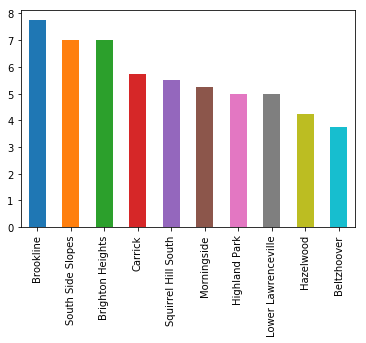

In [259]:
fields_final.head(10).plot(kind="bar")

So after evaluating playing fields we find Brookline on top surprisingly after not being first in any of the three factors, followed closely by South Side Slopes and Brighton Heights which are tied in second.

Now we'll do the same for `Playgrounds` and lastly `Pools`.

Looking at `Playgrounds`:

We want to base the scoring off of the number of playground equipment in each neighborhood, while awarding an extra half point per ADA accessible equipment. This gives us the equations of:

`E + (0.5)A`

Where `E` is Playground Equipment and `A` is ADA accessible equipment. However, the `Playground Equipment` dataset had one last neighborhood than the `Playground` dataset, so we would like to account for that with this equation:

`P + (E-P) + (0.25)A`

Where `P` is total playgrounds. `(E-P)` will allow us to account for that neighborhood only present in `Playgrounds` while not double counting for the other neighborhoods, we do this by setting `fill_value = 1` when we subtract for the final playground scores. Now we'll just do the same as before, creating dataframes and applying the arithmetic of our equation.

Playgrounds:

In [260]:
df1 = playgrounds["neighborhood"].value_counts()
print(df1)

Squirrel Hill South         8
South Side Slopes           5
Beechview                   5
Sheraden                    4
Highland Park               4
Allegheny Center            4
Mount Washington            3
Hazelwood                   3
South Oakland               3
Elliott                     3
Beltzhoover                 3
Crawford-Roberts            3
Carrick                     3
Garfield                    2
Manchester                  2
Central Northside           2
Bloomfield                  2
East Liberty                2
Lincoln Place               2
Marshall-Shadeland          2
Lincoln-Lemington-Belmar    2
Troy Hill                   2
Brighton Heights            2
Crafton Heights             2
Greenfield                  2
Upper Lawrenceville         2
South Side Flats            2
Morningside                 2
Brookline                   2
Terrace Village             1
                           ..
Perry North                 1
Esplen                      1
Bluff     

Playground Equipment:

In [276]:
df2 = playground_equipment["neighborhood"].value_counts()
print(df2)

Squirrel Hill South         32
Beechview                   21
Allegheny Center            15
South Side Slopes           14
Sheraden                    13
Hazelwood                   13
Mount Washington            10
Highland Park               10
Regent Square                9
Garfield                     9
Lincoln Place                9
East Liberty                 8
Fineview                     8
Brighton Heights             8
Carrick                      7
Brookline                    7
Beltzhoover                  7
Bloomfield                   7
Greenfield                   7
Manchester                   7
Elliott                      7
Troy Hill                    7
South Oakland                7
Lincoln-Lemington-Belmar     6
Banksville                   6
Swisshelm Park               6
Perry North                  6
Crawford-Roberts             6
Crafton Heights              5
Marshall-Shadeland           5
                            ..
Oakwood                      4
Homewood

ADA Accessible:

In [262]:
df3 = accessible_playgrounds["neighborhood"].value_counts()
df3 = df3.multiply(0.5)
print(df3)

Squirrel Hill South         3.5
South Side Slopes           2.0
Beechview                   2.0
Mount Washington            1.5
Sheraden                    1.5
Elliott                     1.5
Highland Park               1.5
Brighton Heights            1.0
Fineview                    1.0
Lincoln-Lemington-Belmar    1.0
South Side Flats            1.0
Carrick                     1.0
Hazelwood                   1.0
Beltzhoover                 1.0
Greenfield                  1.0
Bloomfield                  1.0
Manchester                  1.0
Morningside                 1.0
East Liberty                1.0
Crawford-Roberts            1.0
Duquesne Heights            0.5
Homewood West               0.5
Windgap                     0.5
Marshall-Shadeland          0.5
South Oakland               0.5
Central Lawrenceville       0.5
Spring Hill-City View       0.5
West End                    0.5
Upper Hill                  0.5
Lincoln Place               0.5
Perry South                 0.5
New Home

In [263]:
playgrounds_final = df2.subtract(df1, fill_value=1).add(df1, fill_value=0).add(df3, fill_value=0)
playgrounds_final = playgrounds_final.sort_values(ascending=False)
print(playgrounds_final)

Squirrel Hill South         35.5
Beechview                   23.0
South Side Slopes           16.0
Allegheny Center            15.5
Sheraden                    14.5
Hazelwood                   14.0
Highland Park               11.5
Mount Washington            11.5
Garfield                     9.5
Lincoln Place                9.5
Regent Square                9.5
Brighton Heights             9.0
East Liberty                 9.0
Fineview                     9.0
Elliott                      8.5
Greenfield                   8.0
Carrick                      8.0
Bloomfield                   8.0
Beltzhoover                  8.0
Manchester                   8.0
South Oakland                7.5
Troy Hill                    7.5
Crawford-Roberts             7.0
Brookline                    7.0
Lincoln-Lemington-Belmar     7.0
Perry North                  6.5
Banksville                   6.5
Swisshelm Park               6.5
South Side Flats             6.0
Morningside                  6.0
          

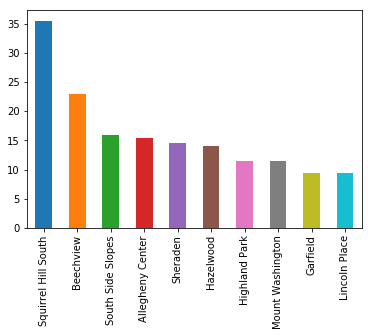

In [264]:
playgrounds_final.head(10).plot(kind="bar")

Unlike **playing fields**, the is no sign of Brookeline in the top ten of **playgrounds*. Instead we see a strong showing from Squirrel Hill South and a pretty commanding second from Beechview.

Finally lets evaluate `Pools`:

We decided upon awarding every Spray Park 3 points, every pool 1 point with an added 2 points if it has a large capacity, and awarding an extra point to those whose water souce is of the best quality. Leaving us with the equation:

`(3)S + P + (2)C + W`

Where `S` is Spray Parks, `P` is pools, `C` is high capacity pools, and `W` is high quality water sources. Finally, we'll do the same as before.

Spray Parks:

In [265]:
df1 = spray_parks["neighborhood"].value_counts()
df1 = df1.multiply(3)
print(df1)

East Hills                  3
Beltzhoover                 3
Beechview                   3
Hazelwood                   3
Lincoln-Lemington-Belmar    3
South Side Slopes           3
Troy Hill                   3
Shadyside                   3
Name: neighborhood, dtype: int64


Pools:

In [266]:
df2 = pools["neighborhood"].value_counts()
print(df2)

South Side Flats       2
Highland Park          2
Brighton Heights       1
Bedford Dwellings      1
Bloomfield             1
Allegheny Center       1
Lincoln Place          1
Sheraden               1
Greenfield             1
Perry North            1
Brookline              1
Westwood               1
Banksville             1
Homewood South         1
Squirrel Hill South    1
Mount Washington       1
Polish Hill            1
Carrick                1
Name: neighborhood, dtype: int64


High Capacity Pools:

In [267]:
df3 = better_pools["neighborhood"].value_counts()
df3 = df3.multiply(2)
print(df3)

South Side Flats       4
Perry North            2
Greenfield             2
Westwood               2
Polish Hill            2
Homewood South         2
Brighton Heights       2
Lincoln Place          2
Squirrel Hill South    2
Banksville             2
Carrick                2
Name: neighborhood, dtype: int64


High Water Quality:

In [268]:
df4 = best_water["neighborhood"].value_counts()
print(df4)

Highland Park               2
South Side Flats            1
Greenfield                  1
Brighton Heights            1
Bedford Dwellings           1
Mount Washington            1
Squirrel Hill South         1
Troy Hill                   1
Beltzhoover                 1
Perry North                 1
Allegheny Center            1
Shadyside                   1
Bloomfield                  1
Lincoln-Lemington-Belmar    1
Homewood South              1
Hazelwood                   1
Polish Hill                 1
Carrick                     1
Name: neighborhood, dtype: int64


Now that we created dataframes for each of our variables we just plug and chug.

In [269]:
pools_final = df1.add(df2, fill_value=0).add(df3, fill_value=0).add(df4, fill_value=0)
pools_final = pools_final.sort_values(ascending=False)
print(pools_final)

South Side Flats            7.0
Highland Park               4.0
Carrick                     4.0
Squirrel Hill South         4.0
Shadyside                   4.0
Polish Hill                 4.0
Perry North                 4.0
Beltzhoover                 4.0
Lincoln-Lemington-Belmar    4.0
Brighton Heights            4.0
Homewood South              4.0
Troy Hill                   4.0
Hazelwood                   4.0
Greenfield                  4.0
Banksville                  3.0
Beechview                   3.0
Westwood                    3.0
East Hills                  3.0
Lincoln Place               3.0
South Side Slopes           3.0
Bloomfield                  2.0
Mount Washington            2.0
Bedford Dwellings           2.0
Allegheny Center            2.0
Brookline                   1.0
Sheraden                    1.0
Name: neighborhood, dtype: float64


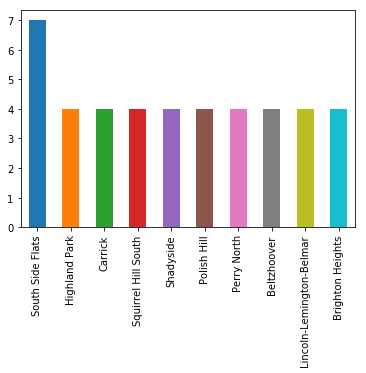

In [270]:
pools_final.head(10).plot(kind="bar")

South side flats dominates the pools category, having two high capacity pools within it. Follow close behind by a bunch of neighborhoods at 4 since that is the maximum value for a neighborhood with one pool.

### Final Equation

At long last we are beginning to reach the finish line and finally crown the best neighborhood in Pittsburgh. We have each of the individual factors broken down and ranked according to how we defined their equations. Now we just have to create our final equation combining our three factors of Playing Fields, Playgrounds, and Pools to decide upon the best neighborhood for a kid to live in.

We decide that we should weigh each of the three factors relatively the same, so to do this we will be scaling the `Pools` and `Playing Fields` up to contain a similar magnitude to the `Playgrounds`. Resulting in the following final equation.

`(5)F + G + (5)P = H`

Where `F` is our playing field results, `G` is our playground results, `P` is our pool results, and `H` is child happiness. All that's left to do now is apply those factors and add them all up and we'll have objectively solved the enigma of child happiness in Pittsburgh through our empirical formula.

In [272]:
pools_final = pools_final.multiply(5)
fields_final = fields_final.multiply(5)

happiness = pools_final.add(fields_final, fill_value=0).add(playgrounds_final, fill_value=0)
happiness = happiness.sort_values(ascending=False)

print(happiness)

Squirrel Hill South         83.00
South Side Slopes           66.00
Brighton Heights            64.00
Carrick                     56.75
Highland Park               56.50
Beechview                   55.50
Hazelwood                   55.25
South Side Flats            53.50
Brookline                   50.75
Beltzhoover                 46.75
Troy Hill                   46.25
Shadyside                   41.75
Greenfield                  40.50
Mount Washington            40.25
Sheraden                    38.25
Lincoln-Lemington-Belmar    38.25
Allegheny Center            38.00
Perry North                 37.75
Westwood                    34.50
Polish Hill                 33.25
Banksville                  32.75
Morningside                 32.25
Lincoln Place               29.50
Homewood South              28.75
Lower Lawrenceville         27.50
Bedford Dwellings           26.00
Elliott                     23.50
Central Lawrenceville       21.00
East Hills                  20.00
Regent Square 

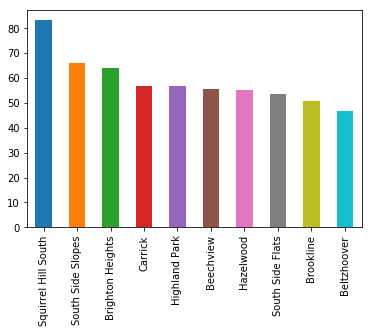

In [273]:
happiness.head(10).plot(kind="bar")

## THE UNDISPUTED, INTERNATIONAL, LOCAL, CHILDHOOD HAPPINESS CENTER OF PITTSBURGH IS:

# SQUIRREL HILL SOUTH